In [2]:
import os
for dirname, _, filenames in os.walk('/Users/eyal.beigman/COVID19/Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
from toolz import compose

/Users/eyal.beigman/COVID19/Data/us-counties.csv
/Users/eyal.beigman/COVID19/Data/.DS_Store
/Users/eyal.beigman/COVID19/Data/covid-19-italy-situation-monitoring-by-region.csv
/Users/eyal.beigman/COVID19/Data/covid-19-italy-situation-monitoring-by-region(1).csv
/Users/eyal.beigman/COVID19/Data/us-counties_o.csv
/Users/eyal.beigman/COVID19/Data/covid19-global-forecasting-week-3/test.csv
/Users/eyal.beigman/COVID19/Data/covid19-global-forecasting-week-3/submission.csv
/Users/eyal.beigman/COVID19/Data/covid19-global-forecasting-week-3/train.csv
/Users/eyal.beigman/COVID19/Data/covid19-global-forecasting-week-2/test.csv
/Users/eyal.beigman/COVID19/Data/covid19-global-forecasting-week-2/submission.csv
/Users/eyal.beigman/COVID19/Data/covid19-global-forecasting-week-2/train.csv


In [3]:
mycolumns=['state','region_code','region','latitude','longitude','recovered','ICI',
         'total_hospitelized','home_quarantine','total_positives','delta_total_positives',
         'new_positives','discharged_helthy','deaths','cases','swabs',
         'note_italian','note_english']


In [4]:
dataset = pd.read_csv("/Users/eyal.beigman/COVID19/Data/covid-19-italy-situation-monitoring-by-region(1).csv",parse_dates=['data'], index_col='data')
#,parse_dates=['date']
dataset.columns=mycolumns
dataset.tail()

,state,region_code,region,latitude,longitude,recovered,ICI,total_hospitelized,home_quarantine,total_positives,delta_total_positives,new_positives,discharged_helthy,deaths,cases,swabs,note_italian,note_english
data,,,,,,,,,,,,,,,,,,
2020-04-09 17:00:00,ITA,9,Toscana,43.769231,11.255889,1038,256,1294,4409,5703,146,173,441,408,6552,65461,NaN,NaN
2020-04-09 17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,345,69,414,1564,1978,38,106,462,268,2708,14338,NaN,NaN
2020-04-09 17:00:00,ITA,10,Umbria,43.106758,12.388247,154,38,192,600,792,-31,9,455,51,1298,15170,NaN,NaN
2020-04-09 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,118,18,136,473,609,3,18,154,105,868,3142,NaN,NaN
2020-04-09 17:00:00,ITA,5,Veneto,45.434905,12.338452,1530,274,1804,8645,10449,278,523,1728,756,12933,171456,NaN,NaN


In [5]:
set(dataset['region'])

{'Abruzzo',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardia',
 'Marche',
 'Molise',
 'P.A. Bolzano',
 'P.A. Trento',
 'Piemonte',
 'Puglia',
 'Sardegna',
 'Sicilia',
 'Toscana',
 'Umbria',
 "Valle d'Aosta",
 'Veneto'}

In [6]:
df0=dataset[dataset['region']=='Lombardia']
df1=dataset[dataset['region']=='Toscana']
df2=dataset[dataset['region']=='Umbria']
df3=dataset[dataset['region']=='Veneto']
df4=dataset[dataset['region']=='Piemonte']


/Users/eyal.beigman/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


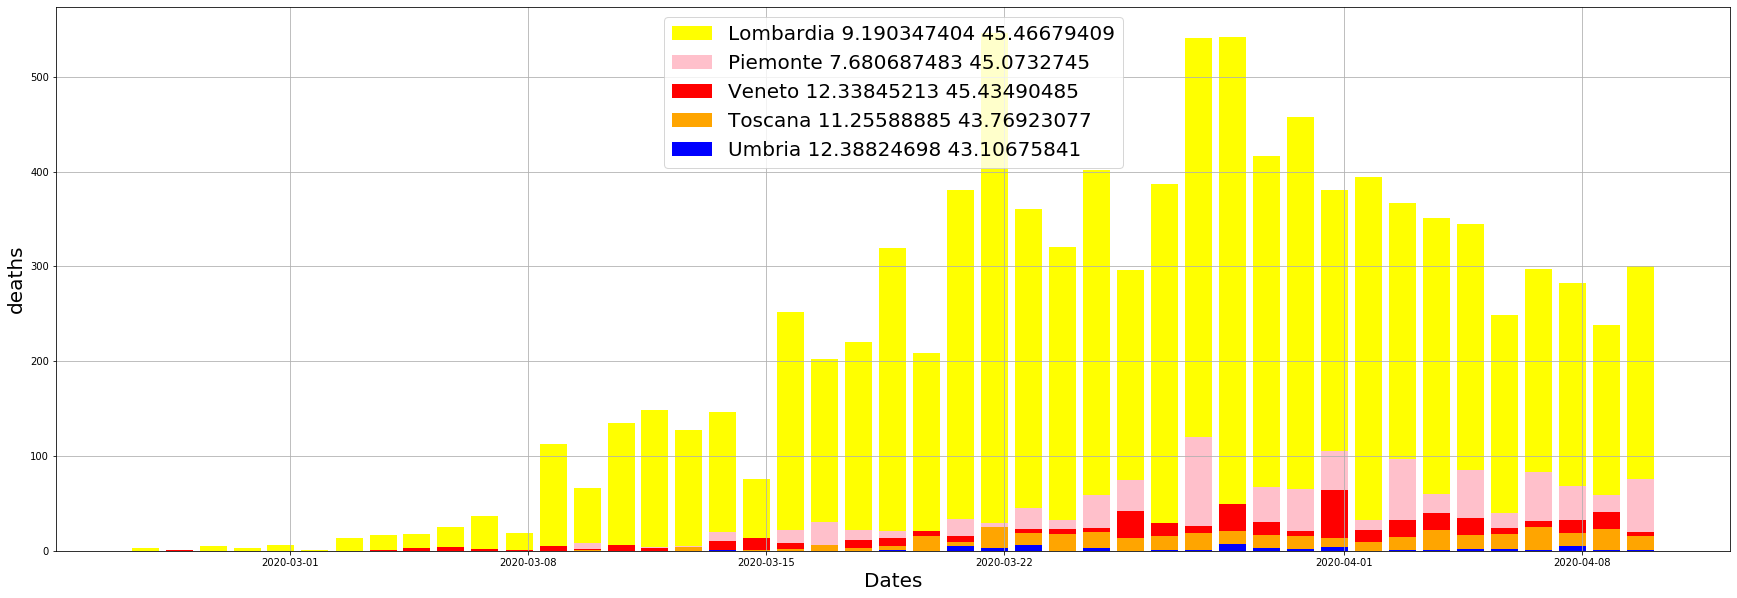

In [7]:
plt.figure(figsize=(30,10))
lbl0='Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])
plt.bar(df0.index, df0['deaths'].diff(), color = 'yellow', label=lbl0 )
lbl4='Piemonte '+str(df4['longitude'][0])+' '+str(df4['latitude'][0])
plt.bar(df4.index, df4['deaths'].diff(), color = 'pink', label = lbl4)
lbl3='Veneto '+str(df3['longitude'][0])+' '+str(df3['latitude'][0])
plt.bar(df3.index, df3['deaths'].diff(), color = 'red', label = lbl3)
lbl1='Toscana '+str(df1['longitude'][0])+' '+str(df1['latitude'][0])
plt.bar(df1.index, df1['deaths'].diff(), color = 'orange', label = lbl1)
lbl2='Umbria '+str(df2['longitude'][0])+' '+str(df2['latitude'][0])
plt.bar(df2.index, df2['deaths'].diff(), color = 'blue', label = lbl2)
#plt.xticks(np.arange(0, total_days, int(total_days/10)),fontsize = 15)
#plt.yticks(np.arange(0, total_cases, int(total_cases/5)), fontsize = 15)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('deaths',fontsize=20)
plt.legend(frameon=True, fontsize=20)
plt.grid(True)
plt.show()

In [60]:
'Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])

'Lombardia 9.190347404 45.46679409'